# Wine Quality Test
- Target = quality

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/hrishinandanmacbook/Developer/ML/001/02/WineQT.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [6]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

- No missing values

In [7]:
df.duplicated().sum()

np.int64(0)

- No duplicate values

- All are numerical values so no need for:
    - Splitting
    - Encoding

In [8]:
X = df.drop('quality', axis=1)
y = df['quality']

- Splitting X and y as y is a numerical target variable
- We do not need to handle outliers of target variable

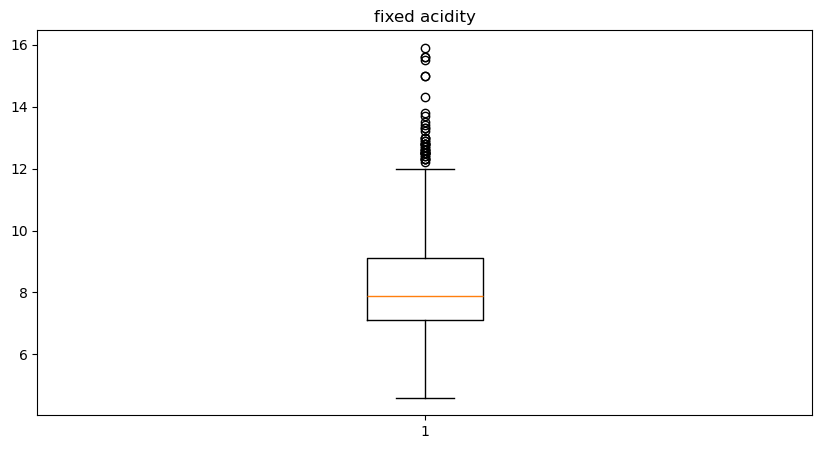

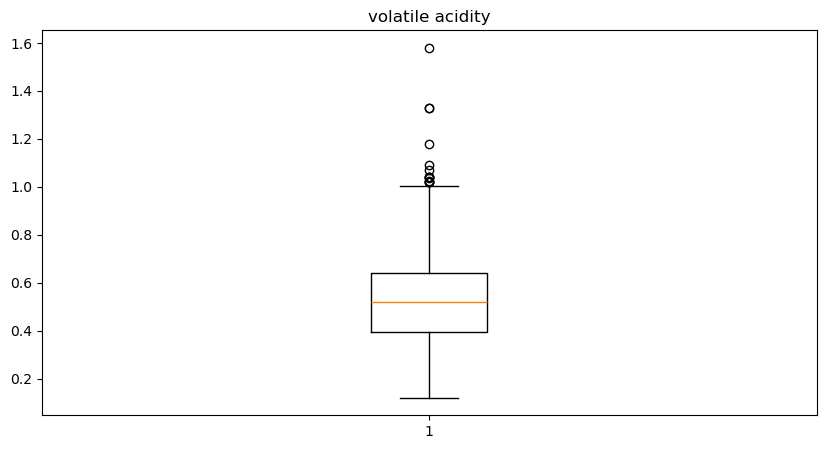

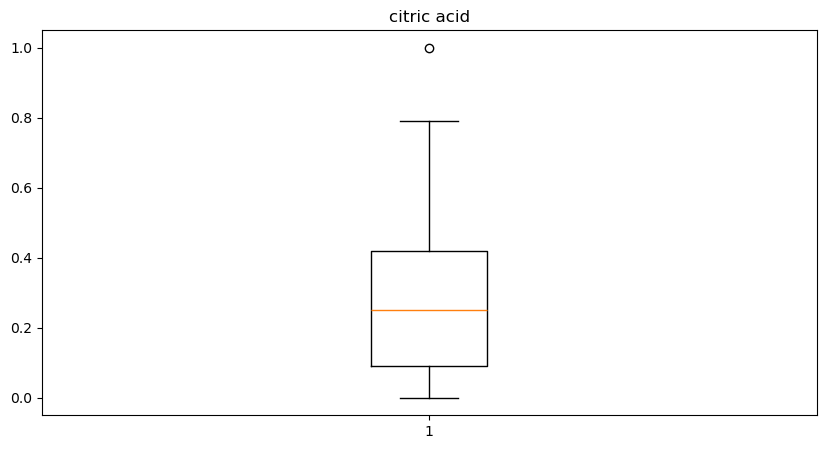

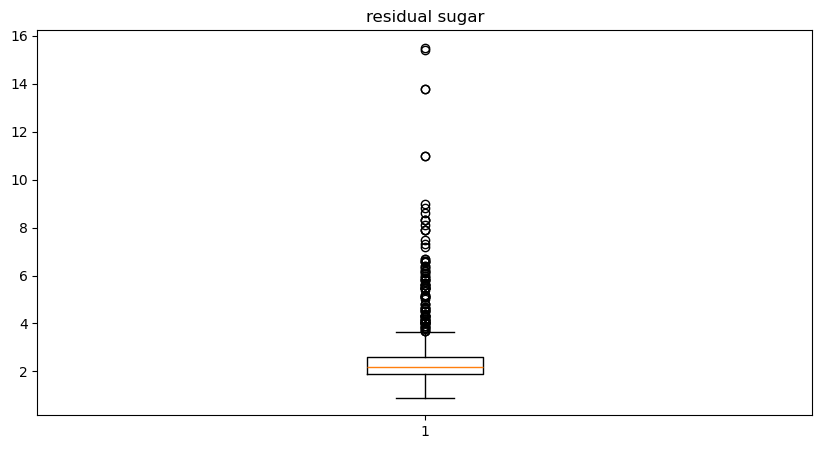

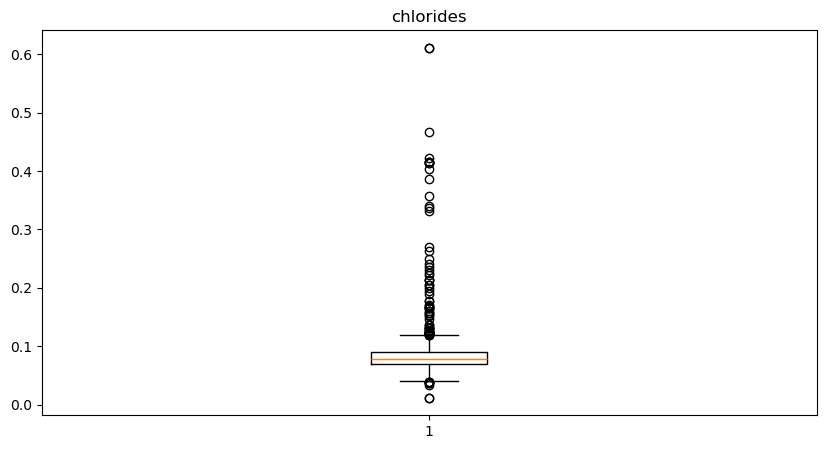

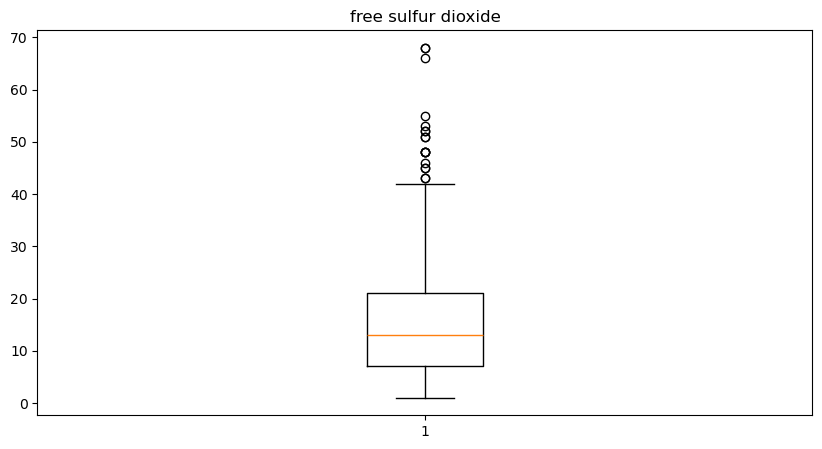

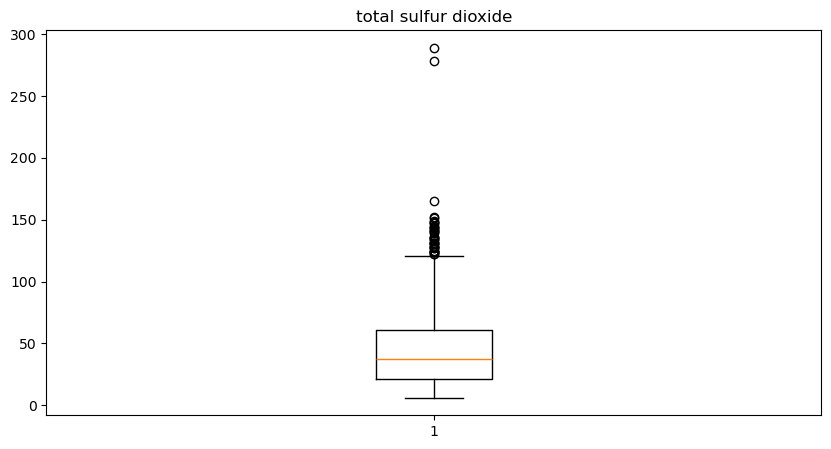

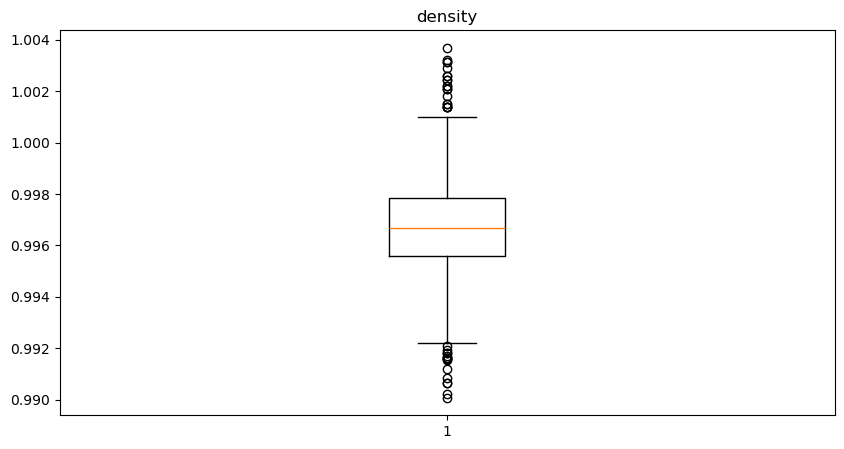

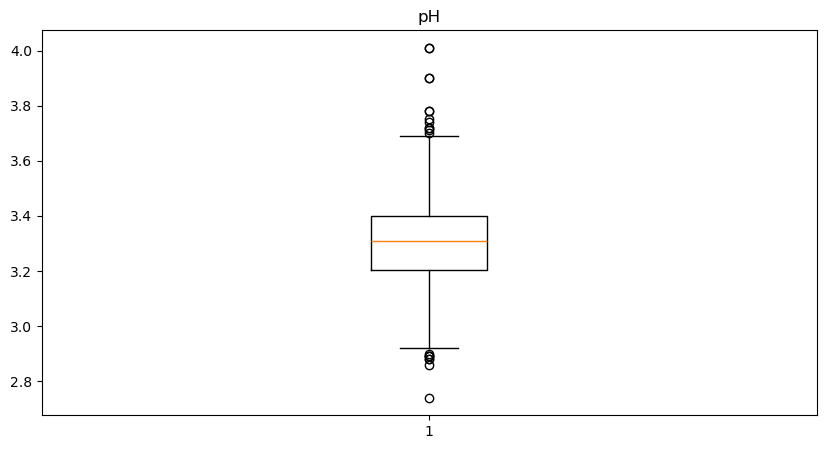

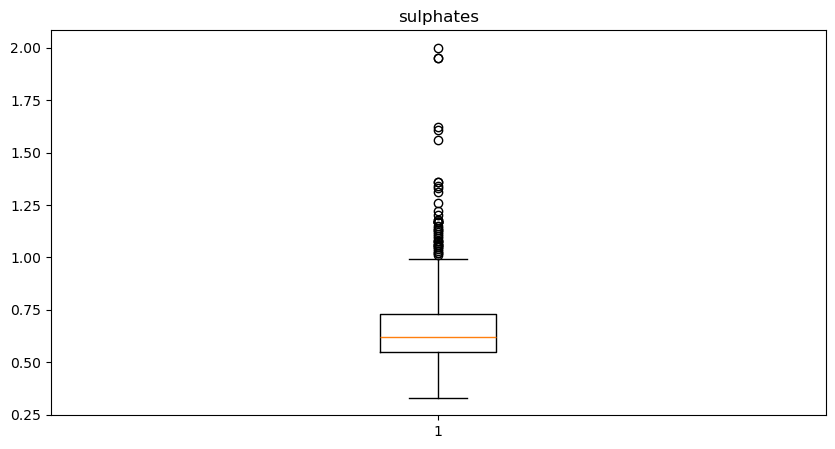

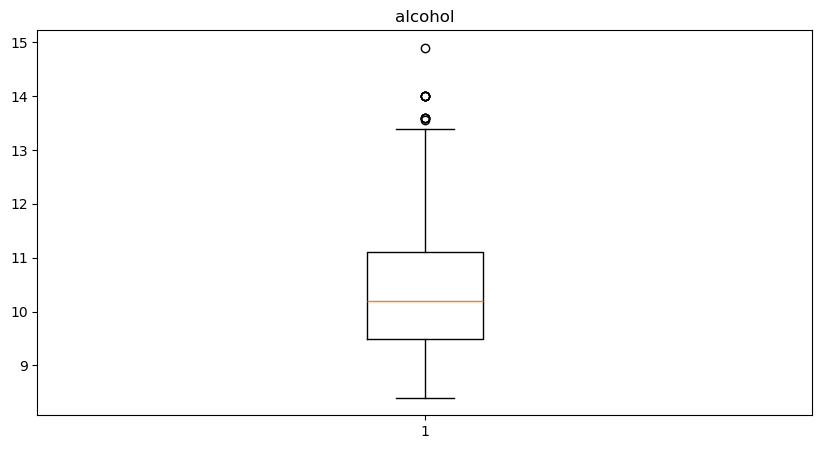

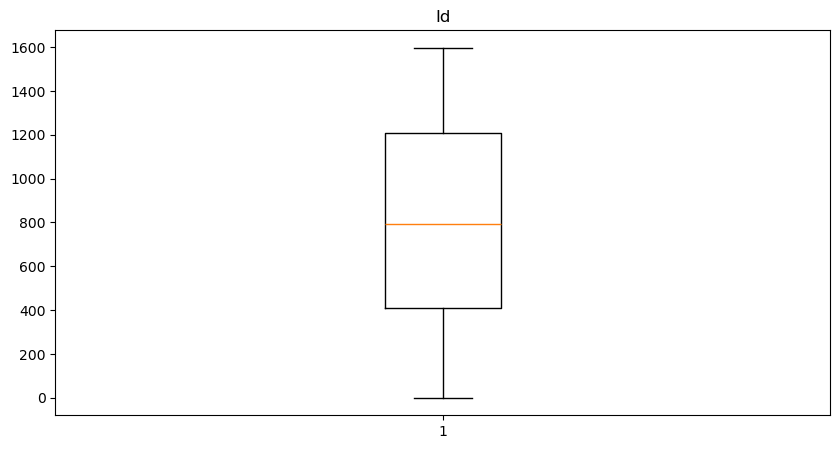

In [9]:
for col in X.columns:
    plt.figure(figsize=(10, 5))
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

In [10]:
for col in X.columns:
    q1 = X[col].quantile(0.25)
    q3 = X[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    X[col] = X[col].clip(lower=lower, upper=upper)

- Handled outliers of each column

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

- Standardized independent features

### Logistic Regression

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train) 

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [14]:
y_pred = model.predict(X_test)

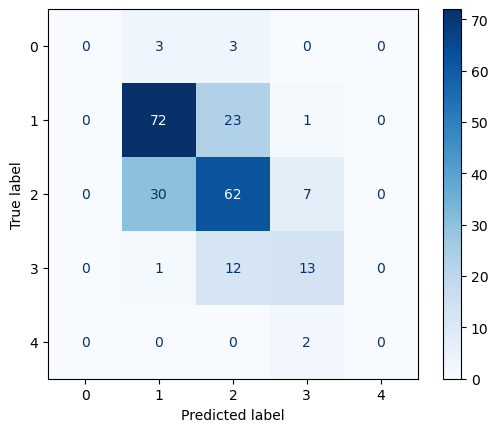

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred, average='macro', zero_division=1)
rec = recall_score(y_test, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)

In [40]:
print('Accuracy: ', acc)
print('Precision: ', pre)
print('Recall: ', rec)
print('F1_score: ', f1)

Accuracy:  0.6419213973799127
Precision:  0.7728925348646432
Recall:  0.3752525252525253
F1_score:  0.37331982198322383


### KNN Classification

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [20]:
y_pred_knn = knn.predict(X_test)

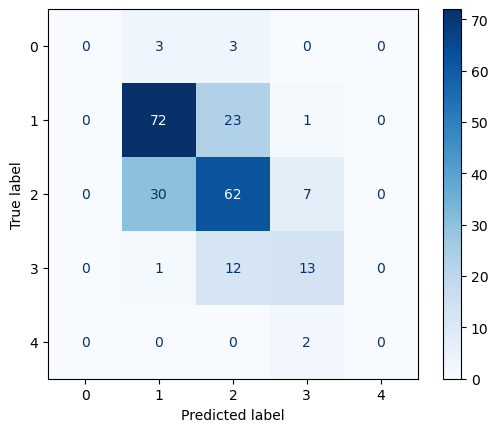

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred, average='macro', zero_division=1)
rec = recall_score(y_test, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)

In [26]:
print('Accuracy: ', acc)
print('Precision: ', pre)
print('Recall: ', rec)
print('F1_score: ', f1)

Accuracy:  0.6419213973799127
Precision:  0.7728925348646432
Recall:  0.3752525252525253
F1_score:  0.37331982198322383


### Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(
    criterion='entropy',
    random_state=42,
    max_depth=10
)
tree.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [28]:
y_pred_tree = tree.predict(X_test)

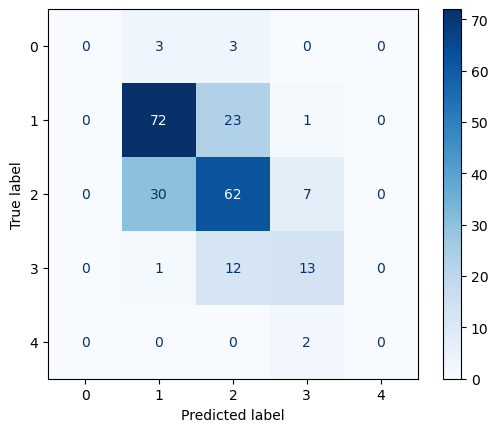

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred, average='macro', zero_division=1)
rec = recall_score(y_test, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)

In [30]:
print('Accuracy: ', acc)
print('Precision: ', pre)
print('Recall: ', rec)
print('F1_score: ', f1)

Accuracy:  0.6419213973799127
Precision:  0.7728925348646432
Recall:  0.3752525252525253
F1_score:  0.37331982198322383


### SVM Classification

In [60]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', C=1.0, gamma='scale')
svc.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [61]:
y_pred_svc = svc.predict(X_test)

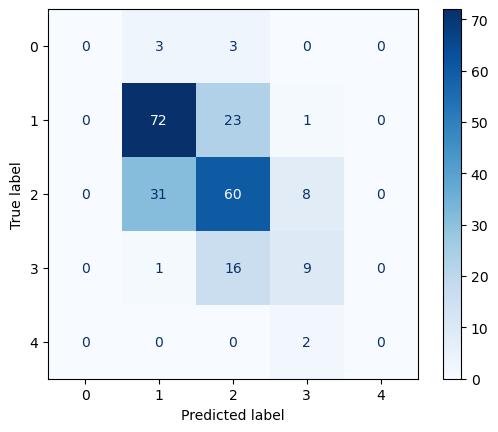

In [62]:
cm = confusion_matrix(y_test, y_pred_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

In [63]:
acc = accuracy_score(y_test, y_pred_svc)
pre = precision_score(y_test, y_pred_svc, average='macro', zero_division=1)
rec = recall_score(y_test, y_pred_svc, average='macro', zero_division=1)
f1 = f1_score(y_test, y_pred_svc, average='macro', zero_division=1)

In [55]:
print('Accuracy: ', acc)
print('Precision: ', pre)
print('Recall: ', rec)
print('F1 score: ', f1)

Accuracy:  0.5720524017467249
Precision:  0.722240201366415
Recall:  0.31393745143745144
F1 score:  0.3152247844404279


## Summary
- Comparitively Logistic Regression, Decision Tree and KNN algorithmn shows higher accuracy and precision than SVM
- In this case all the three models can be suggested with equal priority